[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MrRutledge/JupyterNotebook_Practice/blob/master/Linear_Regression%20.ipynb)



# Linear Regression.

Linear regression is method used to predict the out come from a datasets using the available data. The method has a a number of tools that can be used to predicti the data. The most used technique associated with this method is the mean Square Error method. 

**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Below we begin with fabricating some data that roughly shows a linear relationship between Price and Ave_Area Income:

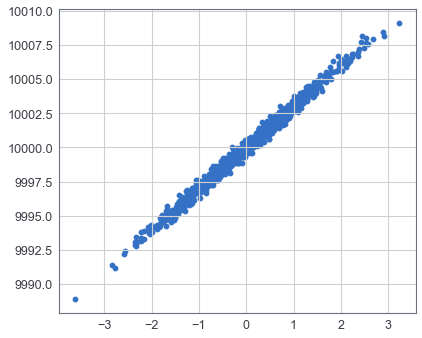

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import numpy as np
from pylab import *
jtplot.style(theme='grade3')


Prices = np.random.normal(0,1.0, 1000)
Ave_Income_Area = 10000 + (Prices - np.random.normal(0,0.1, 1000)) * 3
plt.xkcd()
scatter(Prices, Ave_Income_Area)

We then we use Scipy to compute the stats for our graph above.

In [2]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(Ave_Income_Area, Prices)


In [3]:
print("R Value: " ,r_value)
print("RSquared Value: " ,r_value ** 2)
print("Intercept: " ,intercept)

R Value:  0.9950917950118076
RSquared Value:  0.9902076804998212
Intercept:  -3290.82276617213


Using the computed data above from Scipy to write a function to predict unseen data in this case if recieve new data on the Income area.

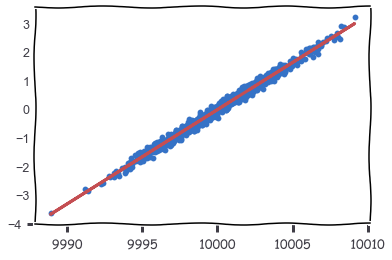

In [4]:
import matplotlib.pyplot as plt

def predict(x):
    return slope * x + intercept

fitLine = predict(Ave_Income_Area)
plt.xkcd()
plt.scatter(Ave_Income_Area, Prices)
plt.plot(Ave_Income_Area, fitLine, c='r',linewidth=3.0)
plt.show()

# Now that we have got the intuition of Linear Regression we can use it on a more realistic dataset to see how well it performs.

In [5]:
#For this dataset we shall need some new libraries 
import seaborn as sns #visualisation library 
import pandas as pd

#### Importing the data

In [6]:
USAhousing = pd.read_csv('datasets/USA_Housing.csv')

In [7]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [8]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


#### pairplots can be useful to give you a quick insight on a given dataset

In [ ]:
sns.pairplot(USAhousing,hue="Price")

C:\Users\Shaki\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Shaki\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Shaki\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Shaki\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Users\Shaki\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarnin

### Since we are analysing a housing dataset, some features are going to be more import than others, for example in this dataset we have the PRICE feature this is important to take a closer look at especially if we're analysing the price of a given house. 

 __We can start off by taking a look at the distribution we shall be using Seabourn for this__

In [ ]:
jtplot.reset()
sns.distplot(USAhousing['Price'])

__From the above plot we can say that we're dealing with a normally distributed data with a standard deviation of 1.3 millions. What we're doing here is to confirm some information that we already new from the pandas describe method we called earlier__

__Now we can use the heatmap to see how the data features corrollate with each other.__

In [ ]:
sns.heatmap(USAhousing.corr(), annot = True)

More insights can be gained from this heatmap about the dataset. for example now we can zoom in on certain features that we expect to gain new knowledge from. It would be pointless to predict a feauture using a datasets that are not corrollated at all.<br>

Some of the new information gained from this heatmap include:
_Price_ is corrollated with _Ave.Area income, Ave.Area House Age_. There is less corrollations between _Price_ and the rest of the features so we shall focus on the features that have a good corrolation with _Price_ for the rest of our analysis in this project.

There is another method using scikit-Learn that we shall introduce later but for now we can try to follow the method used in the generated random data ealier.


In [ ]:
USAhousing.columns

In [ ]:
jtplot.reset()
sns.scatterplot(y='Price', x='Avg. Area Income', hue='Avg. Area House Age', data=USAhousing)

In [ ]:
sns.scatterplot(y='Price', x='Avg. Area House Age', hue='Avg. Area Income', data=USAhousing)

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(USAhousing['Price'], USAhousing['Avg. Area House Age'])

In [ ]:
print("R Value: " ,r_value)
print("RSquared Value: " ,r_value ** 2)
print("Intercept: " ,intercept)

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(USAhousing['Price'], USAhousing['Avg. Area Income'])

In [ ]:
print("R Value: " ,r_value)
print("RSquared Value: " ,r_value ** 2)
print("Intercept: " ,intercept)

Using the above values as confirmation we can move ahead with Ave. Area Income as our main feature of interest for this analysis, however this does not mean that the rest of the features dont play a role in the price of the house.

In [ ]:
def USA_data_Predict(x):
    return slope * x + intercept

fitLine = USA_data_Predict(USAhousing['Price'])

plt.scatter(USAhousing['Price'], USAhousing['Avg. Area Income'])
plt.plot(USAhousing['Price'], fitLine, c='r', linewidth=10.0)
plt.show()


At the moment we can predict the price of the house in this dataset just using one feature, but if this is all we needed why did the person who put together this dataset include the rest of the other features. Well it turnsout we can use  this dataset for analysis using another method that will acount for all the features in our dataset.

 ## Linear Regression using Scikit-Learn.

Scikit-learn is one of the most important tools in data analysis, this library is a host of various data analysis algorithms. In this Notebook we're going to use Model Selection tool to help us analyse the price of a given house from the USAHousing dataset.

Unlike the last method where we were doing hand programming most of the algorithms and the functions that we used, using ScikitLearn will liberate us from hard coding all the algorithms and leave us with making decisions and evaluating the algorithms out puts.

This method allows us to see what would happen if all the the features where freezed and analyse what effect a certain feature would have on our feature in our case price.


 __We begin with reminding ourselves of the columns in our dataset__

In [ ]:
USAhousing.columns

Scikit-learn allows us to use all the features with numerical data while making predictions. So we shall dispense with the _Adress_ feature becasue it has text data and we cant do anything with text data at the moment.

Scikit-learn models require us to split datasets into two, we do this as we did before with the Price Feature on side and the rest of the features on the other side.
We do this by creating new Arrays, namely X and Y, and fill them with the appropriate features. 

#### Array X 

In [ ]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

#### Array y

In [ ]:
y = USAhousing['Price']

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

#scale.fit makes the feature scaled to 1--->-1

X = scale.fit_transform(X.as_matrix())

print (X)

est = sm.OLS(y, X).fit()

est.summary()

### NOTE
Remember to reassign the variable *__X and y__* becasue in the above function they are tranformed into an array which gives us trouble in the next part.
We want it in dataframe formart so that pandas can read it

In the above out put we should really be focusing on the coef values, this just reaffirms what we already knew by showing that our previous graphs were right on the money. In this function we decided to use the Xarray features to run the statsmodel estimator function on our model.

From the above summary we can form an equation, the bigger the coef of the feature the more important its role is as a predict feature.

Above we just split the data into the feature (Price/Array_y) we want to predict and the (features/Array_X) we're using to predict it.

Next we shall split the data again this time we want to sets of data, the training data  and the testing data. This is a very important part in our analysis isnce alot can go wrong based on the choices made from here.

__First we need to import Scki_learn again__

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Creating and Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

### Model Evaluation

__We can view the intercept from this scikit-learn analysis__

In [ ]:
print('Intercept: ',lm.intercept_)
print('Coef: ',lm.coef_)

In [ ]:
print("Intercept: " ,lm.intercept_)

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
plt.scatter(y_test,predictions, c='g')

### Residual Histogram

In [ ]:
sns.distplot((y_test-predictions),bins=50)

In [ ]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, c='b', s=0.9, alpha=0.9)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, c='r', s=0.9)
plt.hlines(y = 0, xmin=0, xmax =60, colors='green')

## Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))